# G1. DECISION TREE REGRESSOR GRAPHS

## 1. Importing Libraries and Datasets

In [1]:
# Libraries

import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_columns', 100)

In [2]:
# Train Dataset

train_data = pd.read_csv("BG_Train_Dataset.csv") 
train_df = train_data.copy()
train_df.head(1)

,Age,BMI,Smoking,Pre Operative Fast,Pre Operative Glucose,Sex,Cort,LV,ASA,Post Operative Glucose
0,3.346,4.337,1.549,5.791,7.307,1,1,1,2,129


In [3]:
# Test Dataset

test_data = pd.read_csv("BG_Test_Dataset.csv") 
test_df = test_data.copy()
test_df.head(1)

,Age,BMI,Smoking,Pre Operative Fast,Pre Operative Glucose,Sex,Cort,LV,ASA,Post Operative Glucose
0,4.165,5.322,0.0,8.05,6.734,0,0,1,3,130


## 2. Decision Tree Regressor

In [4]:
# Defining X_train and Y_train

Y_train = train_df['Post Operative Glucose']
X_train = train_df.drop('Post Operative Glucose', axis = 1)
X_train.head(1)

,Age,BMI,Smoking,Pre Operative Fast,Pre Operative Glucose,Sex,Cort,LV,ASA
0,3.346,4.337,1.549,5.791,7.307,1,1,1,2


In [5]:
# Using the KFold function for cross-validation

cv = KFold(n_splits = 5, shuffle = True, random_state = 126)

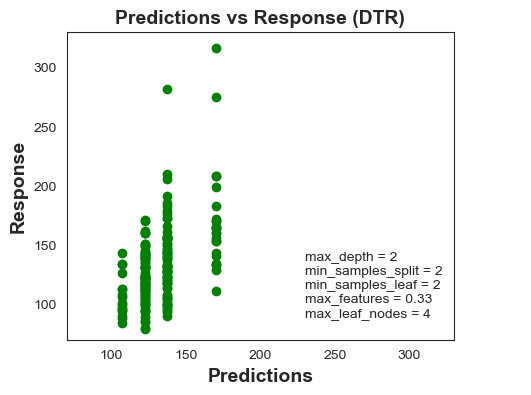

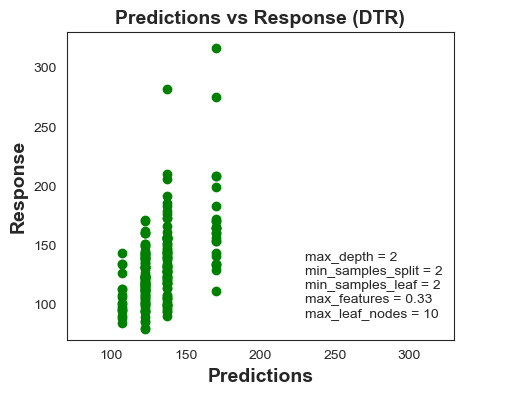

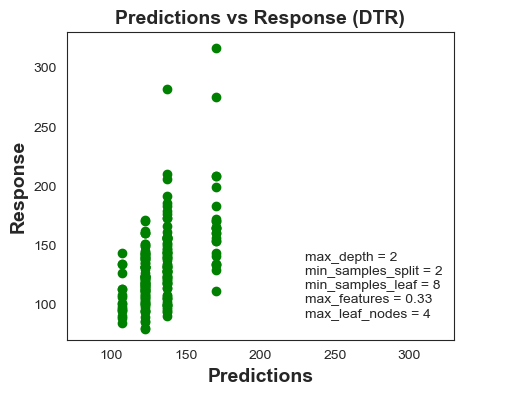

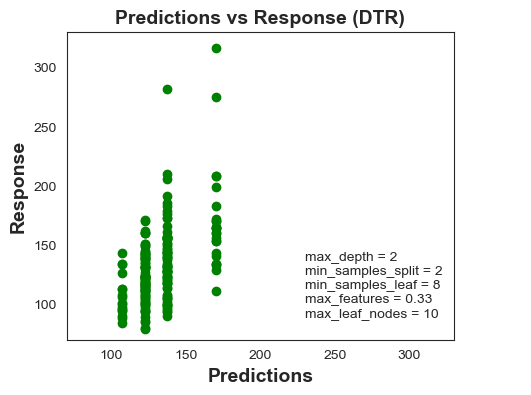

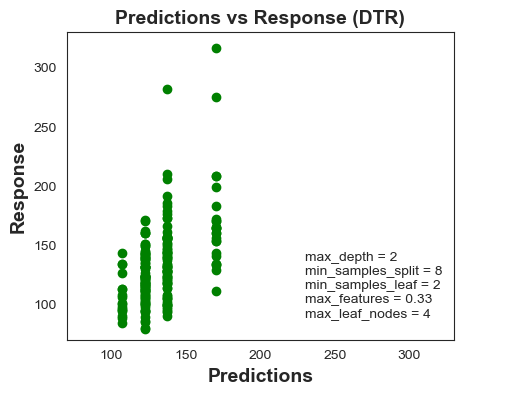

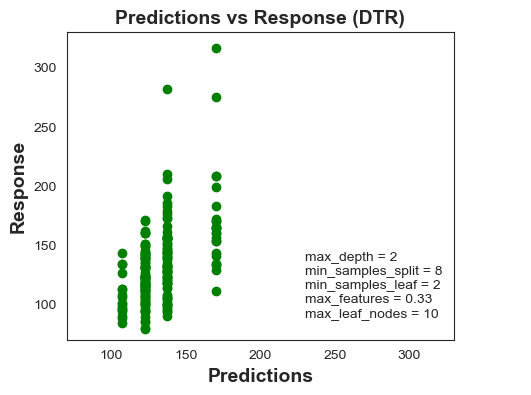

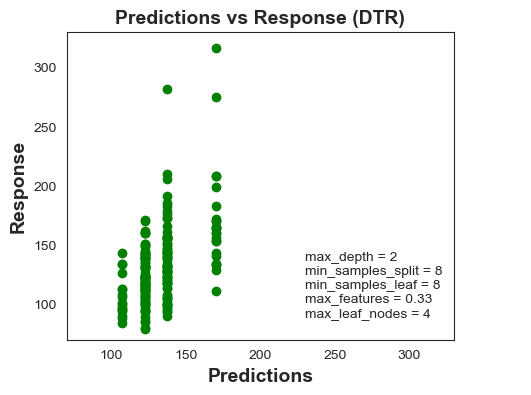

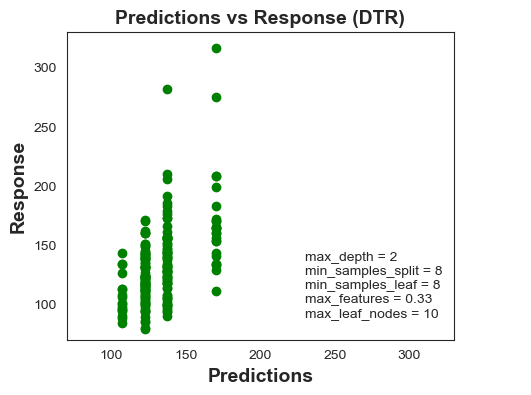

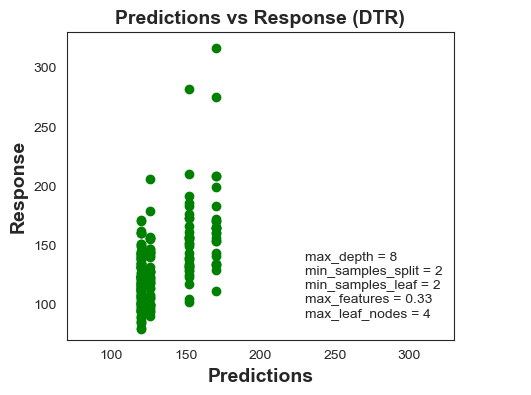

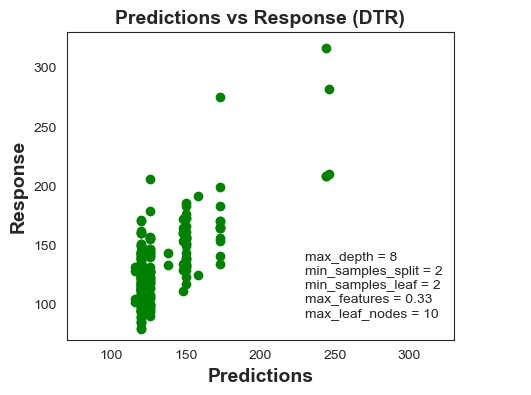

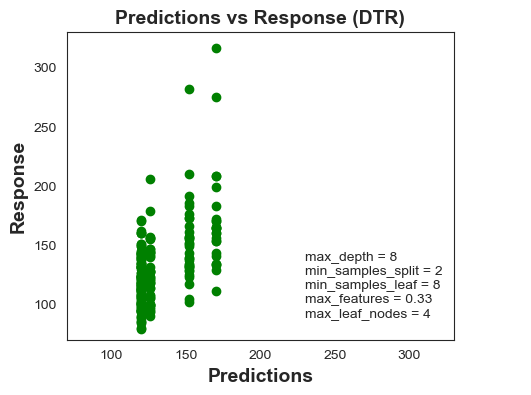

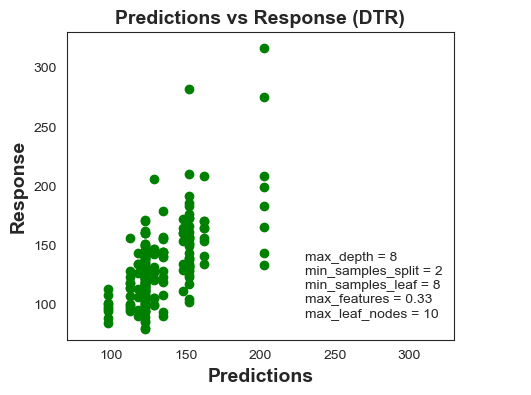

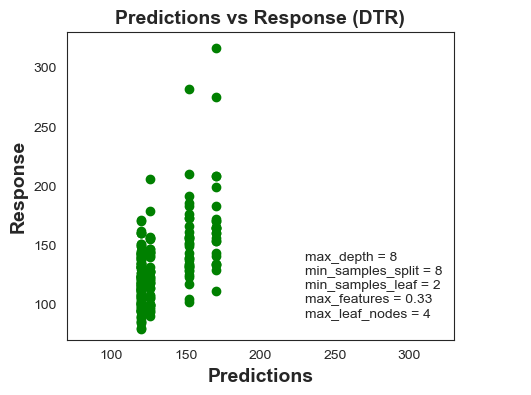

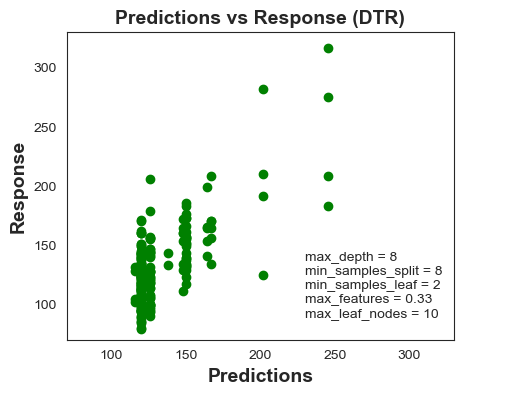

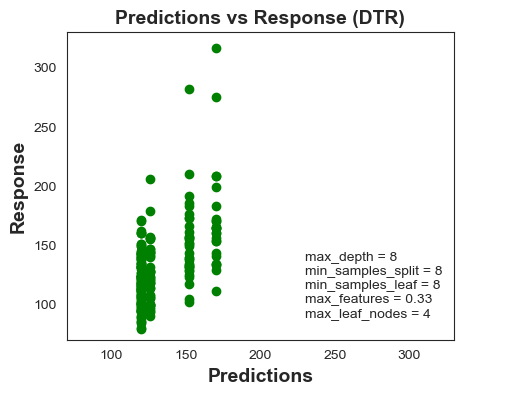

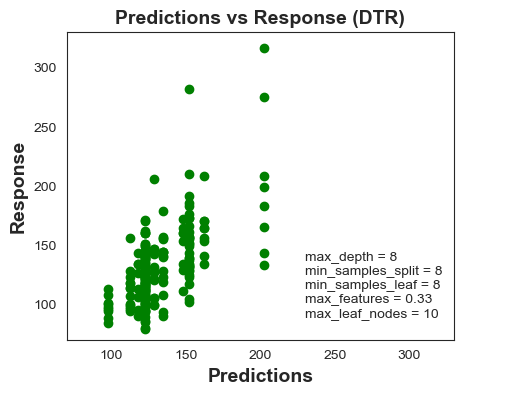

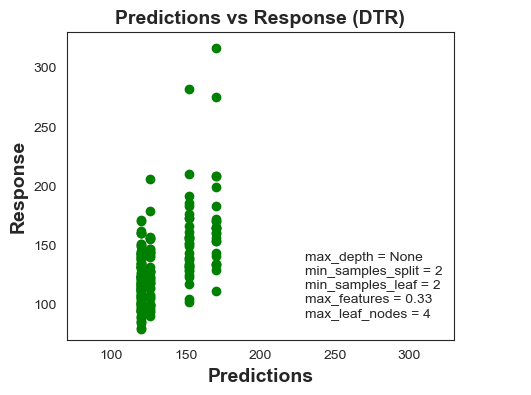

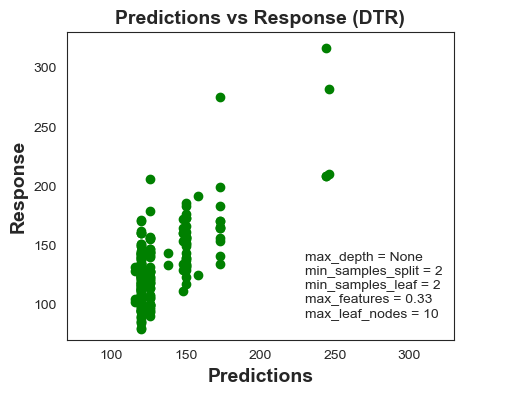

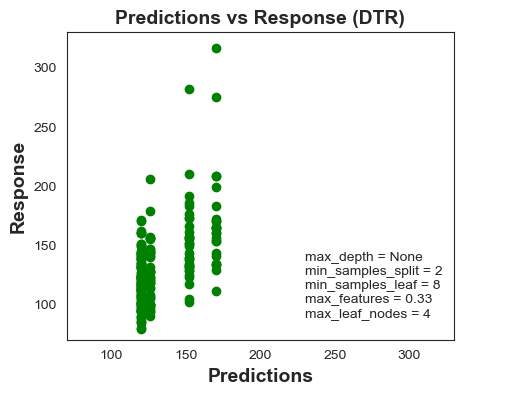

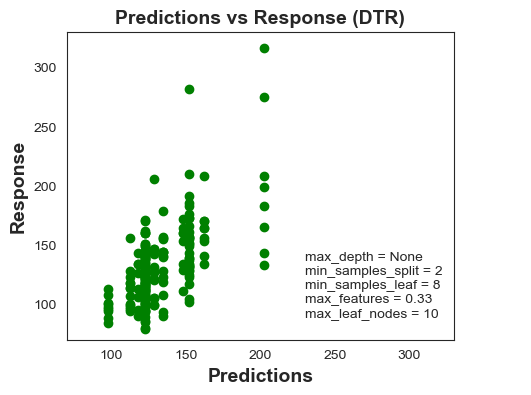

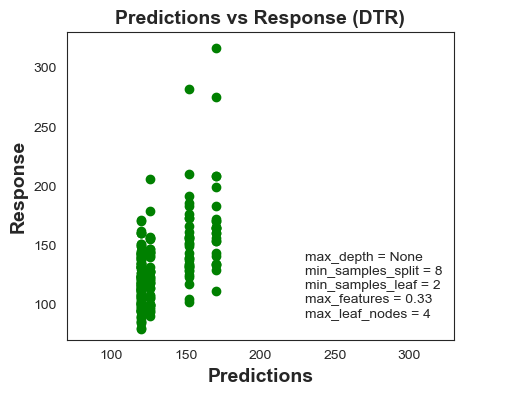

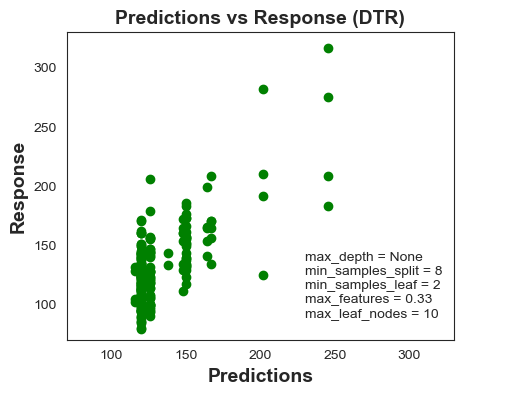

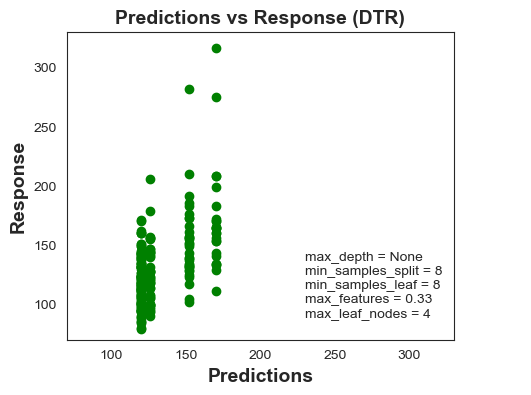

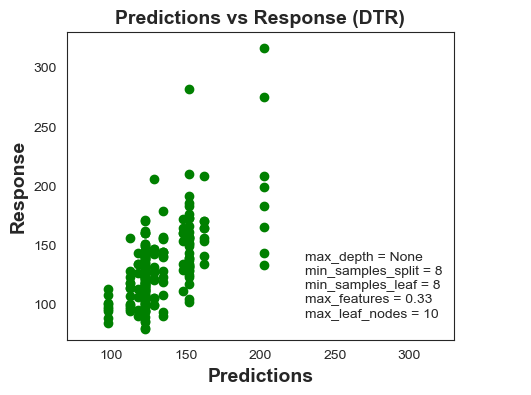

In [6]:
# Creating Response vs Predictions graphs with different DTR models in order to show the form of graphs 

for max_depth in [2,8,None]:
    for min_samples_split in [2,8]:
        for min_samples_leaf in [2,8]:
            for max_features in [0.33]:
                for max_leaf_nodes in [4, 10]:
                    
                    DTR_model = DecisionTreeRegressor(random_state = 126, 
                                                      max_depth = max_depth,
                                                      min_samples_leaf= min_samples_leaf,
                                                      min_samples_split = min_samples_split,
                                                      max_features = max_features,
                                                      max_leaf_nodes = max_leaf_nodes).fit(X_train, Y_train)
                    
                    DTRPredictions = DTR_model.predict(X_train)
                    
                    # Plotting predictions vs response 

                    sns.set_style("white")

                    plt.figure(figsize=(5,4))

                    plt.plot(DTRPredictions, Y_train, 'o', color = 'green')

                    # Uncomment the following lines to add a fitted line

                    #b,a = np.polyfit(DTRPredictions, Y_train, 1)
                    # plt.plot(DTRPredictions, b*DTRPredictions + a, color = 'black')
                    
                    
                    
                    
                    string1 = "max_depth = {0} \nmin_samples_split = {1} \nmin_samples_leaf = {2} \
                    \nmax_features = {3} \nmax_leaf_nodes = {4}".format(max_depth, min_samples_split,  min_samples_leaf, 
                                                                          max_features, max_leaf_nodes)

                    
                    plt.title(label = 'Predictions vs Response (DTR)', fontsize = 14, 
                              weight = 'bold')
                    plt.xlabel('Predictions',fontsize = 14, weight = 'bold')
                    plt.ylabel('Response',fontsize = 14, weight = 'bold')

                    plt.xlim(70, 330)
                    plt.ylim(70, 330)
                    plt.text(230, 90, string1)
                    
                    plt.show()
                    
                